In [1]:
from torch.utils.tensorboard import SummaryWriter

In [2]:
writer = SummaryWriter()

/home/science/projects/packt/venv/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
for x in range(5):
    y = 100 * x
    writer.add_scalar('y', y, x)
    
writer.close()

In [4]:
%load_ext tensorboard

In [5]:
%tensorboard --logdir ./runs/

In [6]:
writer = SummaryWriter()

for x in range(100):
    y = x**2
    writer.add_scalar('y = x**2', y, x)
    
writer.close()

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [8]:
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(1, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.relu(self.fc3(x))

In [24]:
model = MyNet()

In [34]:
print(model)

MyNet(
  (fc1): Linear(in_features=1, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=1, bias=True)
)


In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
np.random.seed(42)

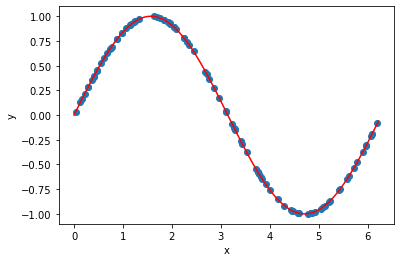

In [37]:
x = 2 * np.pi * np.random.random((100, 1))
y = np.sin(x)

plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')

x_all = np.arange(0, 2*np.pi, 2*np.pi/100).reshape(-1, 1) 
plt.plot(x_all, np.sin(x_all), 'r')

In [38]:
writer = SummaryWriter()

writer.add_graph(model, torch.from_numpy(x).float())
    
writer.close()

In [39]:
x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

In [40]:
lr = 1e-3
n_epochs = 4000

In [41]:
loss_fn = nn.MSELoss(reduction='mean')
optimazer = optim.SGD(model.parameters(), lr=lr)

In [42]:
for epoch in range(n_epochs):
    y_predict = model(x_tensor)
    loss = loss_fn(y_tensor, y_predict)
    loss.backward()
    optimazer.step()
    optimazer.zero_grad()
    if epoch%100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}")

Epoch: 0, Loss: 0.5070521235466003
Epoch: 100, Loss: 0.5070521235466003
Epoch: 200, Loss: 0.5070521235466003
Epoch: 300, Loss: 0.5070521235466003
Epoch: 400, Loss: 0.5070521235466003
Epoch: 500, Loss: 0.5070521235466003
Epoch: 600, Loss: 0.5070521235466003
Epoch: 700, Loss: 0.5070521235466003
Epoch: 800, Loss: 0.5070521235466003
Epoch: 900, Loss: 0.5070521235466003
Epoch: 1000, Loss: 0.5070521235466003
Epoch: 1100, Loss: 0.5070521235466003
Epoch: 1200, Loss: 0.5070521235466003
Epoch: 1300, Loss: 0.5070521235466003
Epoch: 1400, Loss: 0.5070521235466003
Epoch: 1500, Loss: 0.5070521235466003
Epoch: 1600, Loss: 0.5070521235466003
Epoch: 1700, Loss: 0.5070521235466003
Epoch: 1800, Loss: 0.5070521235466003
Epoch: 1900, Loss: 0.5070521235466003
Epoch: 2000, Loss: 0.5070521235466003
Epoch: 2100, Loss: 0.5070521235466003
Epoch: 2200, Loss: 0.5070521235466003
Epoch: 2300, Loss: 0.5070521235466003
Epoch: 2400, Loss: 0.5070521235466003
Epoch: 2500, Loss: 0.5070521235466003
Epoch: 2600, Loss: 0.507

In [43]:
!rm -fr runs/
x = 2 * np.pi * np.random.random((100, 1))
y = np.sin(x)

x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

lr = 1e-3
n_epochs = 4000

model = MyNet()

loss_fn = nn.MSELoss(reduction='mean')
optimazer = optim.SGD(model.parameters(), lr=lr)

writer = SummaryWriter()

for epoch in range(n_epochs):
    y_predict = model(x_tensor)
    loss = loss_fn(y_tensor, y_predict)
    loss.backward()
    optimazer.step()
    optimazer.zero_grad()
    if epoch%100 == 0:
        writer.add_scalar("Loss", loss.item(), epoch)
        writer.add_histogram("fc1/weights", model.fc1.weight.data, epoch)
        writer.add_histogram("fc1/bias", model.fc1.bias.data, epoch)
        writer.add_histogram("fc2/weights", model.fc2.weight.data, epoch)
        writer.add_histogram("fc2/bias", model.fc2.bias.data, epoch)
        writer.add_histogram("fc3/weights", model.fc3.weight.data, epoch)
        writer.add_histogram("fc3/bias", model.fc3.bias.data, epoch)
    
writer.close()

In [ ]:
writer = SummaryWriter()

for batch in range(5):
    images, labels = dataiter.next()
    img_grid = torchvision.utils.make_grid(images)
    writer.add_image("Fashion MNIST batch", img_grid, batch)

writer.close()